### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.<br>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [81]:
from scipy.stats import norm

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.<br>

In [4]:
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.<br>

In [6]:
X = boston['data']


In [7]:
y = boston['target']

In [8]:
X = pd.DataFrame(X, columns=boston['feature_names'])

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
y = pd.DataFrame(y, columns=['price'])

In [11]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)<br>
с помощью функции train_test_split так, чтобы размер тестовой выборки<br>
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Масштабируйте данные с помощью StandardScaler.<br>

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston['feature_names'])

In [17]:
X_test_scaled = scaler.transform(X_test)

In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston['feature_names'])

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [19]:
tsne_model = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne_model.fit_transform(X_train_scaled)

In [21]:
X_train_tsne.shape

(404, 2)


Постройте диаграмму рассеяния на этих данных.

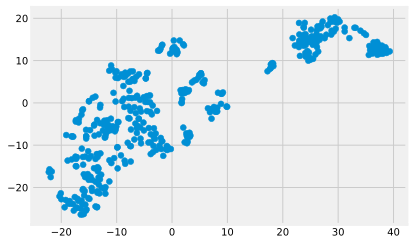

In [22]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,<br>
используйте все признаки из датафрейма X_train.<br>
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [23]:
kmeans_model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
tags = kmeans_model.fit_predict(X_train_scaled)

In [25]:
tags.shape

(404,)

In [26]:
kmeans_model.cluster_centers_.shape

(3, 13)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,<br>
и раскрасьте точки из разных кластеров разными цветами.<br>

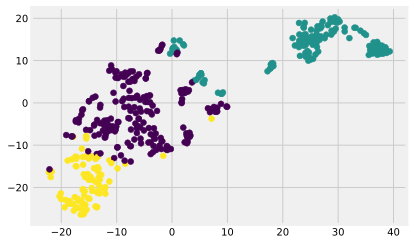

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=tags)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

<i>Я тут решил немного еще графиков распределения цен и коэффициента преступности по кластерам построить

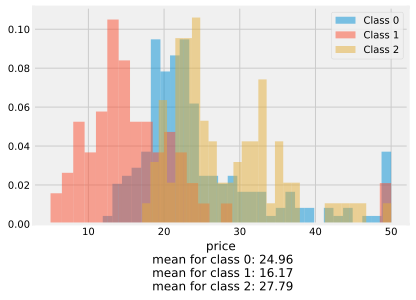

In [124]:
plt.hist(y_train[tags == 0], bins=30, density=True, alpha=0.5)
plt.hist(y_train[tags == 1], bins=30, density=True, alpha=0.5)
plt.hist(y_train[tags == 2], bins=30, density=True, alpha=0.5)
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.xlabel(f'price\n mean for class 0: {round(float(y_train[tags == 0].mean()), 2)}\n mean for class 1: {round(float(y_train[tags == 1].mean()), 2)}\n mean for class 2: {round(float(y_train[tags == 2].mean()), 2)}')
plt.show()

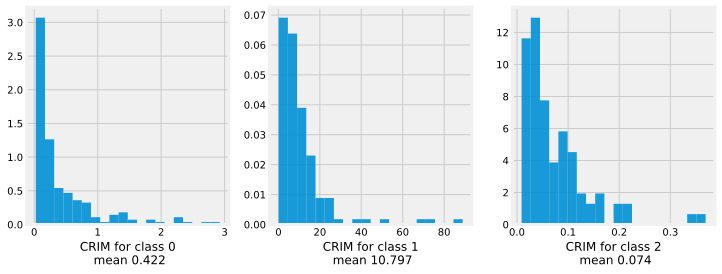

In [188]:
plt.figure(figsize=(11,4))

plt.subplot(131)
plt.hist(X_train[tags == 0]['CRIM'], bins=20, density=True, alpha=0.9)
plt.xlabel(f" CRIM for class 0 \n mean {np.round(X_train[tags == 0]['CRIM'].mean(), decimals=3)}")

plt.subplot(132)
plt.hist(X_train[tags == 1]['CRIM'], bins=20, density=True, alpha=0.9)
plt.xlabel(f" CRIM for class 1 \n mean {np.round(X_train[tags == 1]['CRIM'].mean(), decimals=3)}")

plt.subplot(133)
plt.hist(X_train[tags == 2]['CRIM'], bins=20, density=True, alpha=0.9)
plt.xlabel(f" CRIM for class 2 \n mean {np.round(X_train[tags == 2]['CRIM'].mean(), decimals=3)}")

plt.show()

тут еще странная вещь: не смотря на то, что стоит параметр density=True, у крайних графиков значения по оси ординат странные, и, как я понял, это связанно с тем, что у этих графиков в качестве Х подается массив, в котором элементы меньше единицы, и при построении графкиов плонтости, там происходит проферка того, чтобы, условно говоря, площадь под графиком была равна единице (что логично, исходя из определения функции распределения из тервера), поэтому по оси Y появляются значения больше единицы. И это можно исправить, если, например, умножить все элементы из массива на 100 - картина распределения не поменяется, но сами значения по оси X будут немного некорректные. Поэтому если цель данных графиков - визуализировать характер распределения, то с этой целью они справляются, но по этим графикам посчитать, конкретно какая доля приходится на определенное значение CRIM, не получится, конечно.<br>
А что-то дополнительно считать не особо хочется, если честно<br>
P.S. Но я тут посмотрел в ноутбук к видеоуроку, и там тоже у графиков с плотностью по оси Y значения больше единицы, и, кажется, это не столь уж и важно :с

### Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [171]:
tags_task3 = kmeans_model.predict(X_test_scaled)

In [175]:
tags_task3

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

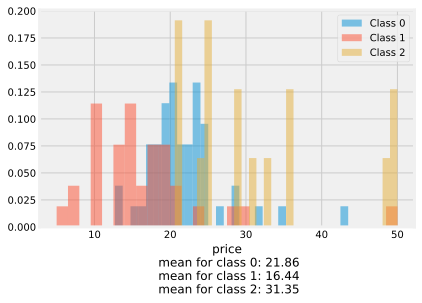

In [177]:
plt.hist(y_test[tags_task3 == 0], bins=30, density=True, alpha=0.5)
plt.hist(y_test[tags_task3 == 1], bins=30, density=True, alpha=0.5)
plt.hist(y_test[tags_task3 == 2], bins=30, density=True, alpha=0.5)
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.xlabel(f'price\n mean for class 0: {round(float(y_test[tags_task3 == 0].mean()), 2)}\n mean for class 1: {round(float(y_test[tags_task3 == 1].mean()), 2)}\n mean for class 2: {round(float(y_test[tags_task3 == 2].mean()), 2)}')
plt.show()

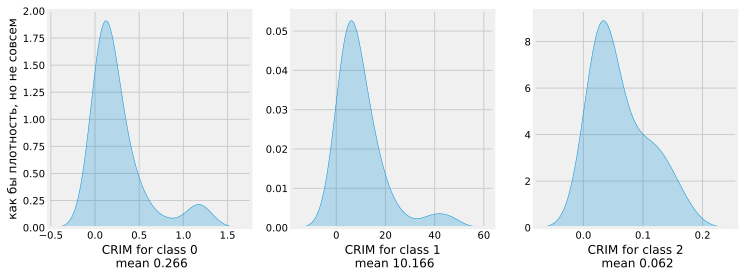

In [187]:
plt.figure(figsize=(11,4))

plt.subplot(131)
sns.kdeplot(X_test[tags_task3 == 0]['CRIM'], shade=True)
plt.xlabel(f" CRIM for class 0 \n mean {np.round(X_test[tags_task3 == 0]['CRIM'].mean(), decimals=3)}")
plt.ylabel('как бы плотность, но не совсем')

plt.subplot(132)
sns.kdeplot(X_test[tags_task3 == 1]['CRIM'], shade=True)
plt.xlabel(f" CRIM for class 1 \n mean {np.round(X_test[tags_task3 == 1]['CRIM'].mean(), decimals=3)}")
plt.ylabel('')

plt.subplot(133)
sns.kdeplot(X_test[tags_task3 == 2]['CRIM'], shade=True)
plt.xlabel(f" CRIM for class 2 \n mean {np.round(X_test[tags_task3 == 2]['CRIM'].mean(), decimals=3)}")
plt.ylabel('')

plt.show()